In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn nltk

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
     --------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

In [5]:
df = pd.read_csv('profanity_en.csv')

In [11]:
print(df.head())


        text canonical_form_1 canonical_form_2 canonical_form_3  \
0         69               69              NaN              NaN   
1        @55              ass              NaN              NaN   
2   @ssfcker             fuck              ass              NaN   
3  @ssfucker             fuck              ass              NaN   
4  @ssfvcker             fuck              ass              NaN   

                     category_1                   category_2 category_3  \
0  sexual anatomy / sexual acts                          NaN        NaN   
1  sexual anatomy / sexual acts                          NaN        NaN   
2  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
3  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
4  sexual anatomy / sexual acts  sexual orientation / gender        NaN   

   severity_rating severity_description  
0              1.0                 Mild  
1              1.0                 Mild  
2              2.8  

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  1598 non-null   object 
 1   canonical_form_1      1598 non-null   object 
 2   canonical_form_2      210 non-null    object 
 3   canonical_form_3      6 non-null      object 
 4   category_1            1598 non-null   object 
 5   category_2            486 non-null    object 
 6   category_3            21 non-null     object 
 7   severity_rating       1598 non-null   float64
 8   severity_description  1598 non-null   object 
dtypes: float64(1), object(8)
memory usage: 112.5+ KB
None


In [13]:
print(df.describe(include='all'))

              text canonical_form_1 canonical_form_2 canonical_form_3  \
count         1598             1598              210                6   
unique        1598              244               33                5   
top     zipperhead             fuck              ass              ass   
freq             1              307               46                2   
mean           NaN              NaN              NaN              NaN   
std            NaN              NaN              NaN              NaN   
min            NaN              NaN              NaN              NaN   
25%            NaN              NaN              NaN              NaN   
50%            NaN              NaN              NaN              NaN   
75%            NaN              NaN              NaN              NaN   
max            NaN              NaN              NaN              NaN   

                          category_1              category_2  \
count                           1598                     48

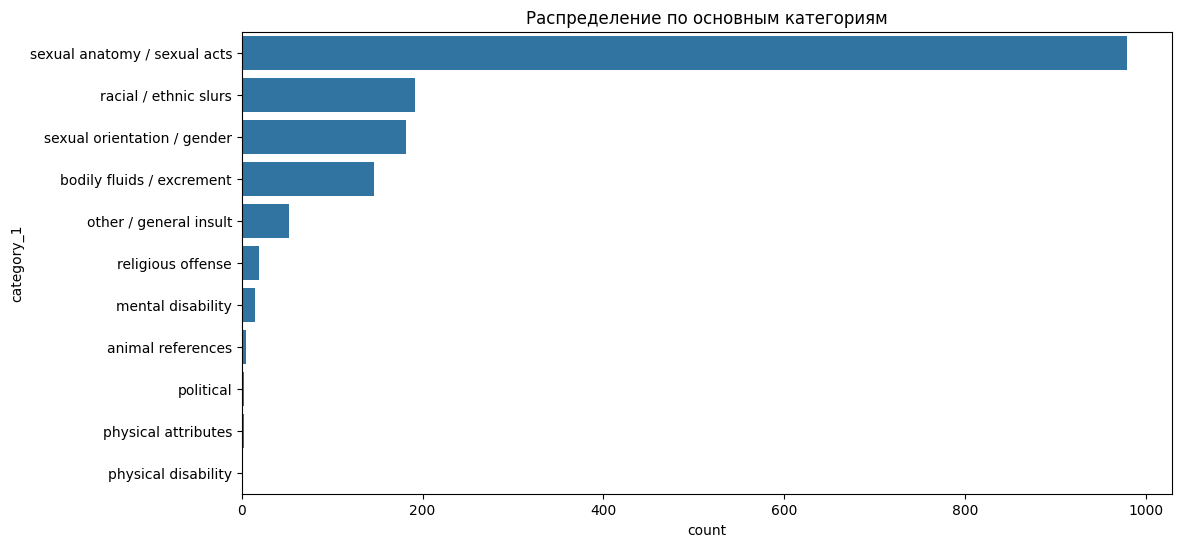

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category_1', data=df, order=df['category_1'].value_counts().index)
plt.title('Распределение по основным категориям')
plt.show()

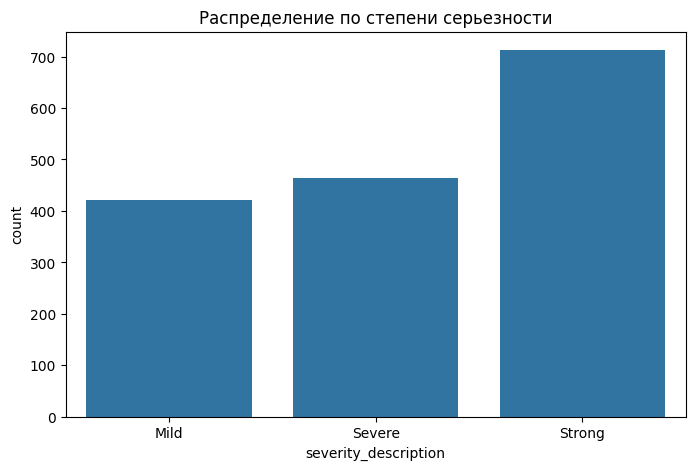

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='severity_description', data=df)
plt.title('Распределение по степени серьезности')
plt.show()

In [16]:
# 1. Основные категории ненормативной лексики: sexual orientation/gender, sexual anatomy/acts, bodily fluids
# 2. Большинство слов имеют уровень серьезности Strong
# 3. Есть пропущенные значения в дополнительных категориях и канонических формах
# 4. Текст является основным признаком для классификации